# **Import Libraries and modules**

In [ ]:
# https://keras.io/
#!pip install -q keras
#import keras

In [26]:
# Setup the GPUs

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
import sys
from keras import layers
from keras import models
import glob
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sklearn.metrics as sklm
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense,  Dropout, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Conv2D
from keras.models import Model,Sequential
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
import tensorflow as tf
from scipy import misc
from skimage import io

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

img_dim_ordering = 'tf'
#K.set_image_dim_ordering(img_dim_ordering)
K.common.image_dim_ordering()

'tf'

In [27]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


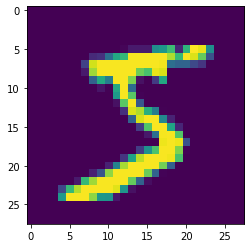

In [29]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [32]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [33]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [34]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
from keras.layers import Activation
model = Sequential()

 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)              

In [46]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\Users\vivek\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1450 - accuracy: 0.9547
Epoch 2/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0460 - accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0338 - accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0256 - accuracy: 0.9916
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0202 - accuracy: 0.9935
Epoch 6/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0159 - accuracy: 0.9950
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0128 - accuracy: 0.9956
Epoch 8/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0111 - accuracy: 0.9963
Epoch 9/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0095 - accuracy: 0.9971
Epoch 10/10
60000/60000 [============

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
print(score)

[0.032456810537600404, 0.9905999898910522]


In [16]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[5.42090391e-21 2.67121849e-18 5.65854438e-13 3.38529844e-08
  1.46485766e-18 3.47392273e-16 1.14182555e-32 1.00000000e+00
  5.09577580e-12 8.22880479e-12]
 [1.60506550e-13 2.52944045e-14 1.00000000e+00 1.34669413e-12
  6.42534997e-25 4.04028813e-16 2.17078916e-12 2.22344776e-26
  5.40663488e-13 3.50967467e-23]
 [4.72235868e-08 9.99816597e-01 2.11087518e-05 6.40423314e-09
  1.05102823e-04 3.28688476e-09 2.75409153e-08 1.82486019e-05
  3.89634042e-05 1.42779868e-08]
 [1.00000000e+00 2.38958973e-20 6.96880376e-09 9.51256489e-14
  5.83196329e-18 5.67094819e-13 3.00475950e-10 9.08679707e-13
  1.01702145e-11 8.11579428e-13]
 [1.38196369e-15 3.37466688e-16 2.38044556e-13 9.30470197e-12
  1.00000000e+00 7.41412492e-16 1.91650962e-14 2.42175857e-09
  2.27312325e-09 1.47944368e-08]
 [1.20164130e-11 9.99848485e-01 3.10545119e-07 7.10903447e-10
  1.30597573e-06 4.47848545e-13 1.30973930e-11 1.45702565e-04
  4.17027650e-06 1.18826442e-08]
 [8.10266274e-22 9.67147369e-12 4.63003413e-09 3.98270869e

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: 'conv2d_14'